In [1]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# mpl_finance 구버젼

In [2]:
from mpl_finance import candlestick2_ohlc

In [3]:
data = fdr.DataReader('005930','2020') # 2020 ~ Now

In [4]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change'], dtype='object')

In [5]:
index = data.index.astype('str')
print("Period from ", index[0], " To ", index[-1])

Period from  2020-01-02  To  2021-08-10


In [6]:
def mydate(x,pos):
    try:
        return index[int(x-0.5)]
    except IndexError:
        return ''

In [7]:
def plot_candle(data,fig_size=(12,7)):
    fig, ax = plt.subplots(figsize=fig_size) # 여기서 차트 크기를 조정 할 수 있습니다.

    # 아래 명령어를 통해 시고저종 데이터를 통해 캔들 차트를 그립니다.
    """
    candlestick2_ohlc(ax,data['Open'],data['High'],
                      data['Low'],data['Close'],width=0.6)
    """

    candlestick2_ohlc(ax,data['Open'],data['High'],
                      data['Low'],data['Close'],width=0.6, colorup='r', colordown='b')
    
    ax.xaxis.set_major_locator(ticker.MaxNLocator(6))

    #ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))

    fig.autofmt_xdate()

    # plt.title('Title')
    
    # tick 숨기기
    plt.xticks([])
    plt.yticks([])
    
    # plt.savefig('d.jpg')
    plt.show()

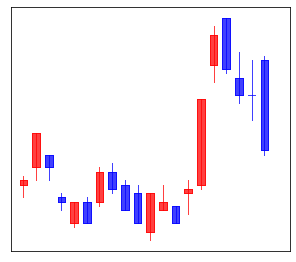

In [8]:
plot_candle(data[-20:], fig_size=(5,5))

# mplfinance 최신 버젼

In [9]:
import mplfinance as mpf

In [10]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

In [11]:
# mav: 이평선
# volume: 거래량 표시
kwargs = dict(type='candle',mav=(2,4,6),volume=True,figratio=(5,5),figscale=1)

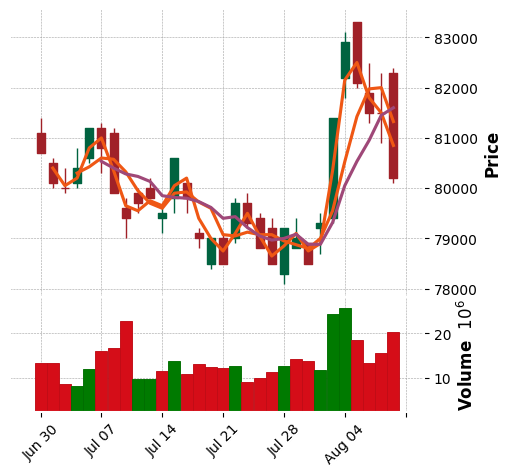

In [12]:
fig = mpf.plot(data[-30:],**kwargs,style='charles')